In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
earthquakes = pd.read_csv('all_month.csv')
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-30T12:18:16.030Z,38.833000,-122.805000,1.97,1.44,md,31.0,50.0,0.01038,0.02,...,2021-11-30T12:21:30.201Z,"7km W of Cobb, CA",earthquake,0.17,0.31,0.13,7.0,automatic,nc,nc
1,2021-11-30T12:17:42.360Z,38.834835,-122.805168,1.98,0.22,md,13.0,61.0,0.01205,0.01,...,2021-11-30T12:19:17.907Z,"7km WNW of Cobb, CA",earthquake,0.32,0.72,0.14,2.0,automatic,nc,nc
2,2021-11-30T11:50:23.770Z,19.332834,-155.099503,1.63,1.87,md,30.0,164.0,NaN,0.30,...,2021-11-30T11:53:40.990Z,"15 km SSE of Fern Forest, Hawaii",earthquake,0.63,0.64,0.94,12.0,automatic,hv,hv
3,2021-11-30T11:37:13.280Z,17.979500,-67.004000,10.00,2.70,md,20.0,155.0,0.04150,0.15,...,2021-11-30T11:52:24.629Z,"4 km E of La Parguera, Puerto Rico",earthquake,0.45,0.59,0.16,10.0,reviewed,pr,pr
4,2021-11-30T11:33:05.650Z,38.835167,-122.805168,1.78,0.85,md,10.0,77.0,0.01202,0.01,...,2021-11-30T11:34:42.006Z,"7km WNW of Cobb, CA",earthquake,0.32,1.04,NaN,1.0,automatic,nc,nc


Notes: Using groupby on Type (Earthquake, Explosions, Ice quake, Quarry Blast?), groupby Location then place, Magnitudes bigger than or equal to 5. Questions: Which locations are hit by (event) most frequently? What time (window) do the events most often occur? What is relationship between time of day and an event occuring? Are there any predictors/strong relationships/indicators that an event is going to occur? Average magnitude per event compared?

In [3]:
earthquakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9134.000000,9134.000000,9134.000000,9133.000000,6564.000000,7580.000000,6370.000000,9133.000000,6740.000000,9133.000000,6993.000000,7577.000000
mean,36.529624,-112.178530,22.755205,1.675445,21.284126,116.696895,0.660005,0.275026,1.676261,2.276648,0.327450,14.108618
std,19.612662,63.009157,53.944145,1.221161,15.674889,58.743783,2.292870,0.288512,3.008785,9.457025,0.601628,26.664414
min,-62.624300,-179.967300,-7.300000,-1.210000,0.000000,12.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000
25%,33.318542,-149.782175,3.152500,0.850000,10.000000,72.000000,0.019095,0.090000,0.280000,0.470000,0.110000,4.000000
50%,38.168950,-121.142751,8.305000,1.480000,16.000000,103.000000,0.063889,0.150000,0.490000,0.780000,0.170000,8.000000
75%,44.980667,-116.000975,19.200000,2.100000,28.000000,151.000000,0.175900,0.397600,0.935134,1.570000,0.264000,15.000000
max,85.862200,179.941000,632.600000,7.500000,221.000000,354.680000,35.610000,2.910000,20.600000,751.600000,5.470000,593.000000


In [4]:
earthquakes.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2570
gap                1554
dmin               2764
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2394
depthError            1
magError           2141
magNst             1557
status                0
locationSource        0
magSource             0
dtype: int64

<AxesSubplot:>

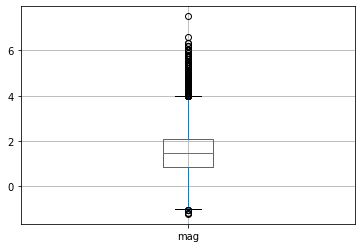

In [5]:
fg, ax = plt.subplots()
earthquakes.boxplot(column='mag', ax=ax)

In [6]:
earthquakes.groupby(['type']).count()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
type,,,,,,,,,,,,,,,,,,,,,
chemical explosion,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
earthquake,8947,8947,8947,8947,8946,8946,6411,7428,6217,8947,...,8947,8947,8947,6608,8947,6842,7424,8947,8947,8947
explosion,49,49,49,49,49,49,41,41,41,49,...,49,49,49,41,49,41,41,49,49,49
ice quake,26,26,26,26,26,26,0,0,0,26,...,26,26,26,0,26,0,0,26,26,26
other event,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
quarry blast,109,109,109,109,109,109,109,109,109,109,...,109,109,109,89,109,108,109,109,109,109
sonic boom,1,1,1,1,1,1,1,0,1,0,...,1,1,1,0,0,0,1,1,1,1


In [7]:
earthquakes.groupby(['type']).sum()['mag']

type
chemical explosion        1.770000
earthquake            15035.670002
explosion                74.070000
ice quake                37.300000
other event               1.560000
quarry blast            151.470000
sonic boom                0.000000
Name: mag, dtype: float64

In [8]:
earthquakes.groupby(['type']).count()['mag']

type
chemical explosion       1
earthquake            8946
explosion               49
ice quake               26
other event              1
quarry blast           109
sonic boom               1
Name: mag, dtype: int64

In [9]:
averageMag = earthquakes.groupby(['type']).sum()['mag']/earthquakes.groupby(['type']).count()['mag']
averageMag

type
chemical explosion    1.770000
earthquake            1.680714
explosion             1.511633
ice quake             1.434615
other event           1.560000
quarry blast          1.389633
sonic boom            0.000000
Name: mag, dtype: float64

In [10]:
averageMag = averageMag.to_frame('Average Magnitude')
averageMag.reset_index(inplace=True)
averageMag

,type,Average Magnitude
0,chemical explosion,1.770000
1,earthquake,1.680714
2,explosion,1.511633
3,ice quake,1.434615
4,other event,1.560000
5,quarry blast,1.389633
6,sonic boom,0.000000


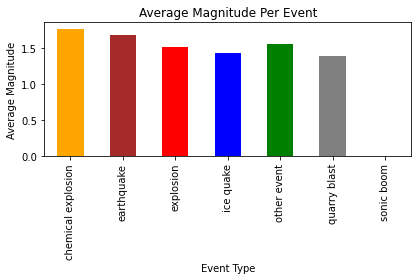

In [11]:
fig1, ax = plt.subplots()
averageMag.plot(kind='bar', x='type', y='Average Magnitude', ax = ax, color=['orange','brown','red','blue','green','gray'], title='Average Magnitude Per Event', ylabel='Average Magnitude', xlabel='Event Type', legend=False)
plt.tight_layout()

In [12]:
fig1.savefig('Figure1_AvMag.jpg')

In [13]:
Magnitude = earthquakes.loc[:,['mag']]
Magnitude

,mag
0,1.44
1,0.22
2,1.87
3,2.70
4,0.85
...,...
9129,0.34
9130,0.65
9131,2.29
9132,4.90


In [ ]:
mag_list = Magnitude.values.tolist()
print(sum(mag_list, []))

In [16]:
Mag = (sum(mag_list, []))
print(Mag)

[1.44, 0.22, 1.87, 2.7, 0.85, 1.29, 4.3, 0.37, 5.0, 0.36, 4.9, 5.0, 1.3, 0.82, 5.0, 1.8, 6.0, 0.4, 2.78, 1.1, 1.69, 1.3, 0.83, 2.1, 0.8, 0.36, 2.08, 2.1, 2.18, 0.9, 1.92, 1.01, 2.1, 2.86, 1.7, 1.26, 1.9, 1.4, 0.29, 1.0, 2.4000001, 2.4, 2.2, 2.17, 1.19, 1.0, 1.0, 2.1, 2.57, 0.61, 5.5, 0.7, 0.81, 1.54, 0.69, 4.5, 1.4, 2.27999997, 0.98, 0.48, 0.49, 0.73, 0.37, 0.37, 0.3, 0.86, 0.82, 1.3, 1.94, 1.11, 0.98, 0.93, 5.0, 0.6, 0.87, 1.78, 0.88, 2.7, 4.9, 1.46, 0.86, 2.08, 2.27999997, 0.36, 2.51, 2.1, 0.66, 3.16, 0.87, 0.86, 0.84, 0.23, 1.95000005, 0.35, 0.86, 1.5, 1.86000001, 0.75, 0.73, 4.6, 0.6, 2.76, 2.57, 0.4, 0.86, 0.49, 1.53, 4.3, 2.49, 5.1, 1.55, 1.63, 4.6, 0.36, 2.51, 1.86000001, 1.3, 2.84, 1.91, 4.4, 0.98, 0.68, 1.3, 2.57, 1.90999997, 0.37, 1.6, 2.08999991, 4.7, 0.36, 1.57, 1.79, 4.6, 0.9, 0.76, 0.18, 2.4, 2.00999999, 1.8, 4.4, 1.5, 1.13, 0.7, 0.53, 2.21, 1.7, 0.21, 2.85, 0.21, 0.33, 4.9, 1.88999999, 4.6, 4.6, 2.0, 2.41, 1.21, 4.7, 0.46, 2.1, 1.23, 1.8, 1.85, 2.0999999, 0.85, 2.9, 1.83

In [62]:
mag_ranges = pd.cut(Mag, 9, right=False, labels=['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H', 'Group I'], retbins=True, precision=3, include_lowest=False, ordered=True)
mag_ranges

(['Group C', 'Group B', 'Group D', 'Group E', 'Group C', ..., 'Group B', 'Group B', 'Group D', 'Group G', 'Group B']
 Length: 9134
 Categories (9, object): ['Group A' < 'Group B' < 'Group C' < 'Group D' ... 'Group F' < 'Group G' < 'Group H' < 'Group I'],
 array([-1.21      , -0.24222222,  0.72555556,  1.69333333,  2.66111111,
         3.62888889,  4.59666667,  5.56444444,  6.53222222,  7.50871   ]))

In [63]:
#labels = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H', 'Group I']
ranges = [-1.5, -0.5,  0.5,  1.5,  2.5,
         3.5,  4.5,  5.5,  6.5,  8.0]
MagRange = pd.DataFrame(earthquakes['mag'].groupby(pd.cut(earthquakes.mag, ranges)).count())
MagRange

,mag
mag,
"(-1.5, -0.5]",68
"(-0.5, 0.5]",1079
"(0.5, 1.5]",3628
"(1.5, 2.5]",2895
"(2.5, 3.5]",506
"(3.5, 4.5]",573
"(4.5, 5.5]",354
"(5.5, 6.5]",28
"(6.5, 8.0]",2


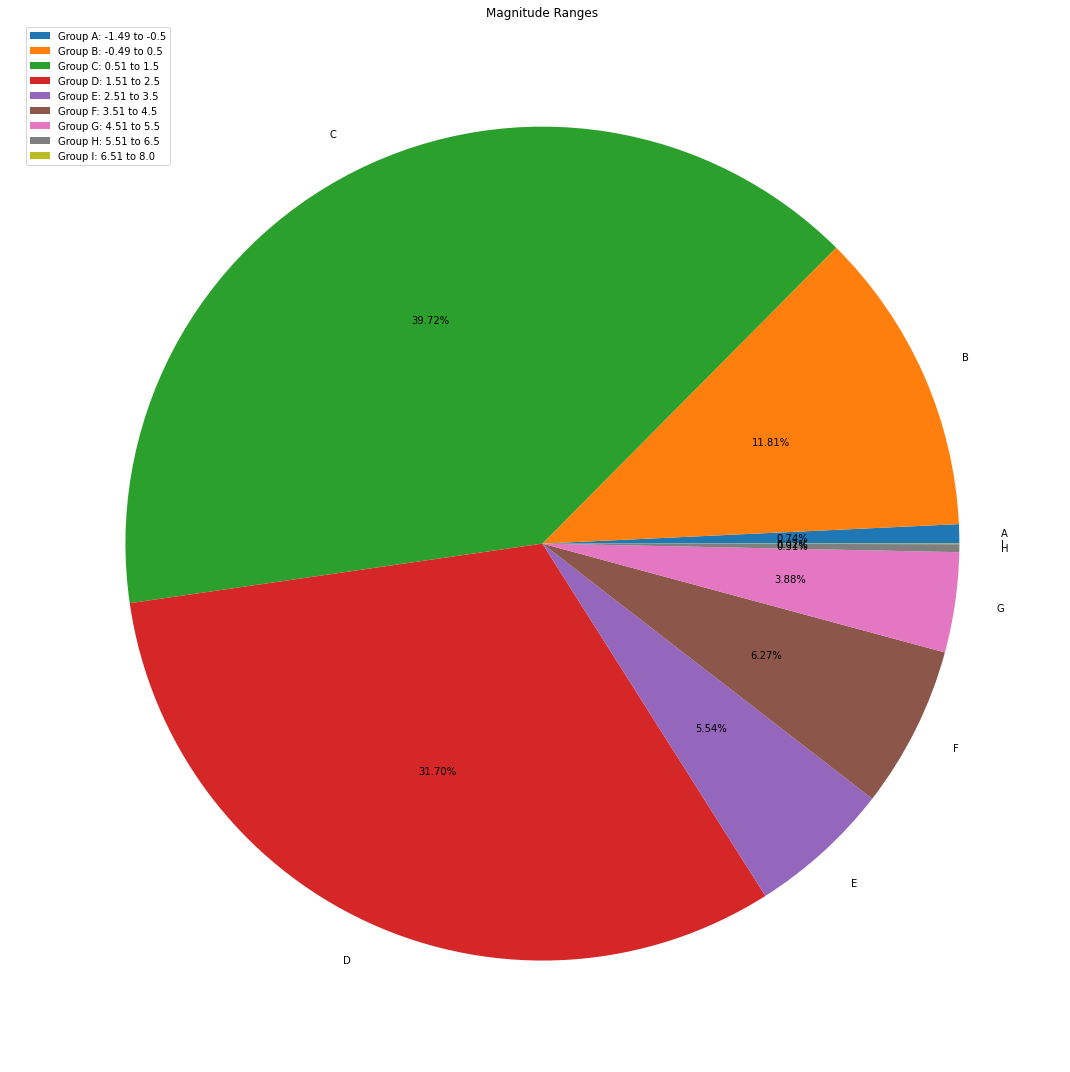

In [74]:
fig2, ax = plt.subplots()

MagPie = MagRange.plot.pie(y='mag', ax=ax, labels=['A','B','C','D','E','F','G','H','I'], autopct='%1.2f%%', figsize=(20,15))
ax.set_title('Magnitude Ranges')
ax.legend(labels=['Group A: -1.49 to -0.5', 'Group B: -0.49 to 0.5', 'Group C: 0.51 to 1.5', 'Group D: 1.51 to 2.5', 'Group E: 2.51 to 3.5', 'Group F: 3.51 to 4.5', 'Group G: 4.51 to 5.5', 'Group H: 5.51 to 6.5', 'Group I: 6.51 to 8.0'], loc='upper left')
ax.yaxis.label.set_color('white')
plt.tight_layout()


#'Group A: -1.49 to -0.5', 'Group B: -0.49 to 0.5', 'Group C: 0.51 to 1.5', 'Group D: 1.51 to 2.5', 'Group E: 2.51 to 3.5', 'Group F: 3.51 to 4.5', 'Group G: 4.51 to 5.5', 'Group H: 5.51 to 6.5', 'Group I: 6.51 to 8.0'
#magnitudes = pd.DataFrame({'ranges': [-1.21, -0.24222222, 0.72555556, 1.69333333, 2.66111111, 3.62888889, 4.59666667, 5.56444444, 6.53222222, 7.50871]},
                  #index=[, 'Group J'])
#plot = magnitudes.plot.pie(subplots=True, figsize=(5, 5))

In [76]:
fig2.savefig('Figure2_MagRange.jpg')

In [99]:
dfDepth = earthquakes[['depth']]
dfDepth

,depth
0,1.97
1,1.98
2,1.63
3,10.00
4,1.78
...,...
9129,4.44
9130,3.47
9131,8.37
9132,121.09


In [106]:
dfDepth2 = pd.DataFrame(dfDepth, columns=['earthquake', 'chemical explosion', 'explosion', 'ice quake', 'other event', 'quarry blast', 'sonic boom'])
dfDepth2

,earthquake,chemical explosion,explosion,ice quake,other event,quarry blast,sonic boom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

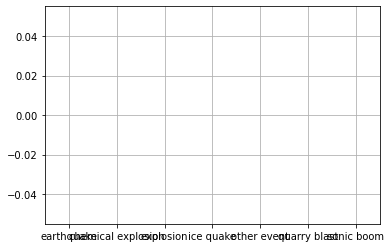

In [107]:
fig3, ax = plt.subplots()
dfDepth2.boxplot(column=['earthquake', 'chemical explosion', 'explosion', 'ice quake', 'other event', 'quarry blast', 'sonic boom'], ax=ax)